In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("seaborn-v0_8-pastel")

sns.set_theme(
    style="whitegrid",
    palette="pastel",
    context="notebook"
)

In [2]:
df = pd.read_csv("social_media_engagement_dataset.csv")

In [3]:
df.head()

platform post_type  post_length   views  likes  comments  shares  \
0   Facebook      Text           62   91660   2968       276     346   
1  Instagram     Video          104  113115   4164       632     406   
2   Facebook     Video           46   36043   3125       188     100   
3   Facebook     Image           39  124886   5970       948     578   
4  Instagram     Video           42   82831   8212      1104     334   

   engagement_rate  
0         0.039166  
1         0.045989  
2         0.094692  
3         0.060023  
4         0.116502

In [4]:
df.shape

(10000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   platform         10000 non-null  object 
 1   post_type        10000 non-null  object 
 2   post_length      10000 non-null  int64  
 3   views            10000 non-null  int64  
 4   likes            10000 non-null  int64  
 5   comments         10000 non-null  int64  
 6   shares           10000 non-null  int64  
 7   engagement_rate  10000 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 625.1+ KB


In [6]:
df.describe()

post_length          views        likes      comments        shares  \
count  10000.000000   10000.000000  10000.00000  10000.000000  10000.000000   
mean      62.359800  127151.950600   7033.26920    879.232800    602.262700   
std       33.264888   75169.927932   5673.59828    812.409438    597.573391   
min        5.000000    2059.000000     35.00000      3.000000      2.000000   
25%       34.000000   65211.000000   2513.75000    275.000000    170.000000   
50%       62.000000  122402.500000   5580.50000    635.000000    406.000000   
75%       91.000000  184217.000000  10276.50000   1228.000000    837.000000   
max      119.000000  299997.000000  29486.00000   5435.000000   3861.000000   

       engagement_rate  
count     10000.000000  
mean          0.066696  
std           0.031598  
min           0.011227  
25%           0.039637  
50%           0.066719  
75%           0.093694  
max           0.132124

In [7]:
df.isnull().sum()

platform           0
post_type          0
post_length        0
views              0
likes              0
comments           0
shares             0
engagement_rate    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
#unique values
df.nunique()

platform              3
post_type             3
post_length         115
views              9795
likes              7450
comments           2625
shares             2072
engagement_rate    9998
dtype: int64

In [10]:
numerical_colums = ["post_length","views","likes","comments","shares","engagement_rate"]
categorical_colums = ["platform","post_type"]

In [11]:
#correlations
correlations = df[numerical_colums].corr()
correlations

post_length     views     likes  comments    shares  \
post_length         1.000000  0.003489  0.007514  0.010287  0.007897   
views               0.003489  1.000000  0.740044  0.648297  0.608048   
likes               0.007514  0.740044  1.000000  0.877651  0.825058   
comments            0.010287  0.648297  0.877651  1.000000  0.720223   
shares              0.007897  0.608048  0.825058  0.720223  1.000000   
engagement_rate     0.000032  0.014413  0.584816  0.546161  0.516389   

                 engagement_rate  
post_length             0.000032  
views                   0.014413  
likes                   0.584816  
comments                0.546161  
shares                  0.516389  
engagement_rate         1.000000

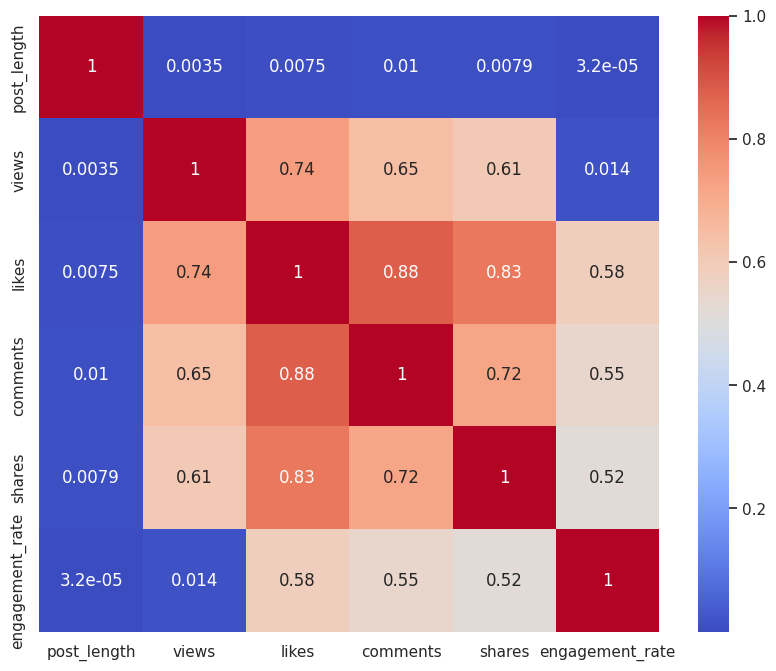

In [12]:
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlations,annot=True,cmap="coolwarm")
plt.show()

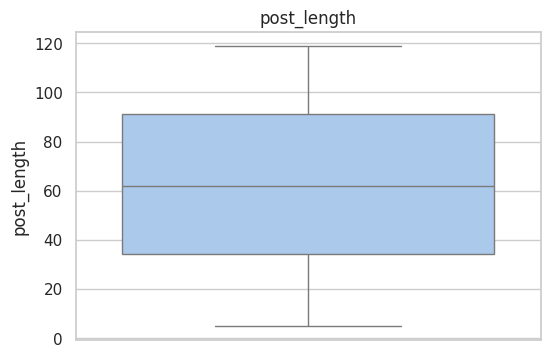

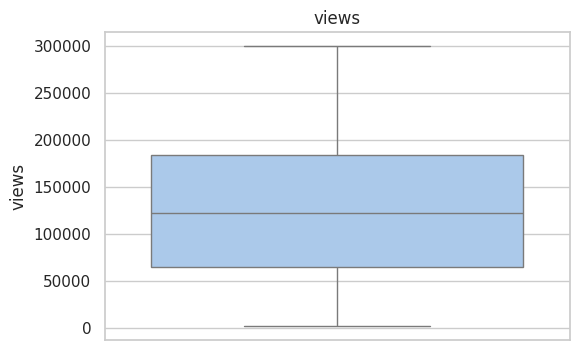

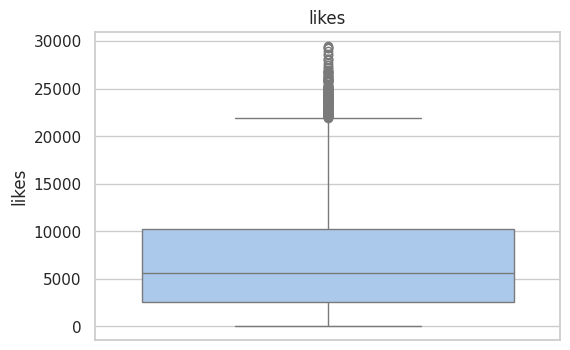

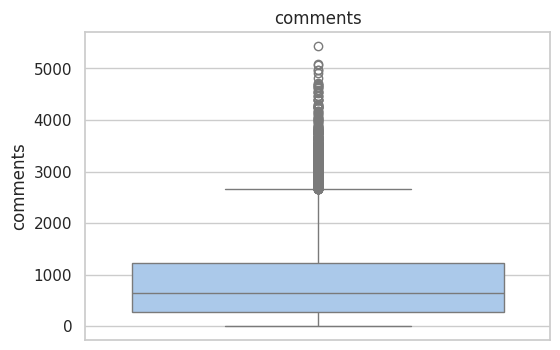

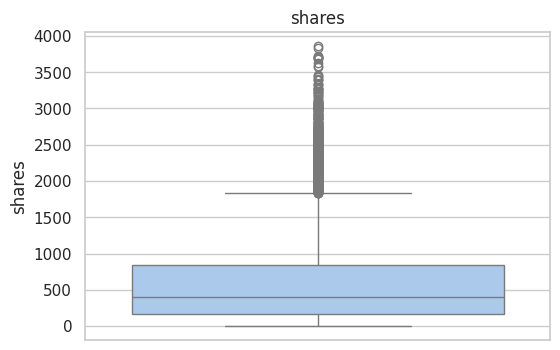

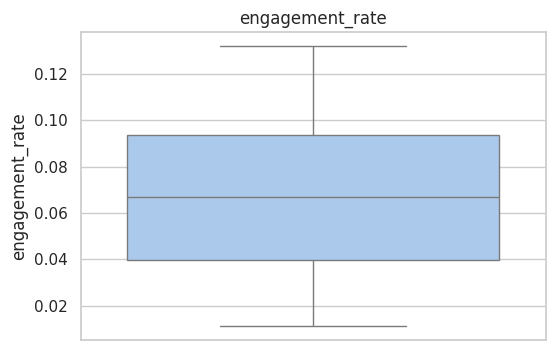

In [13]:
#outlier detection plots
for column in numerical_colums:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

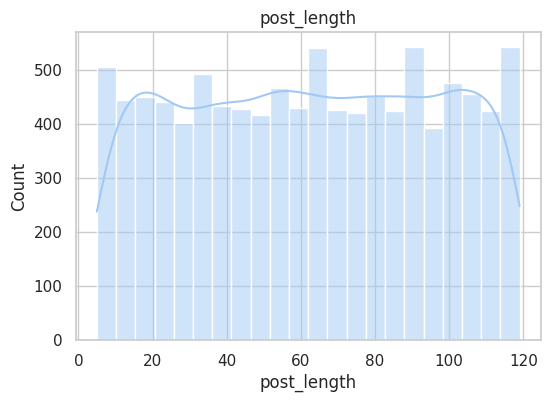

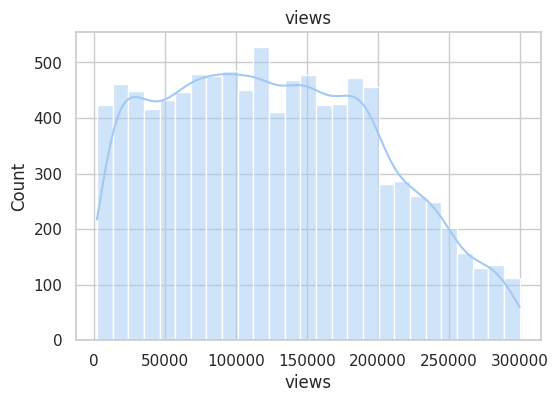

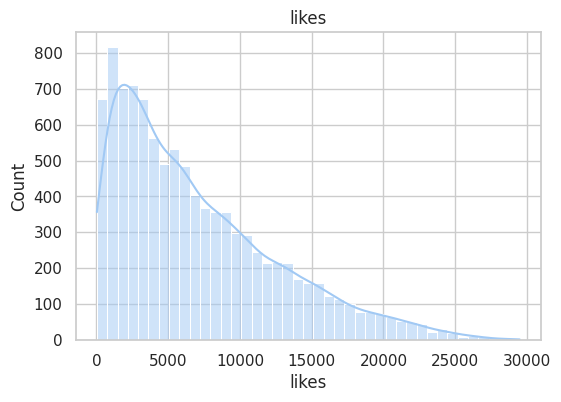

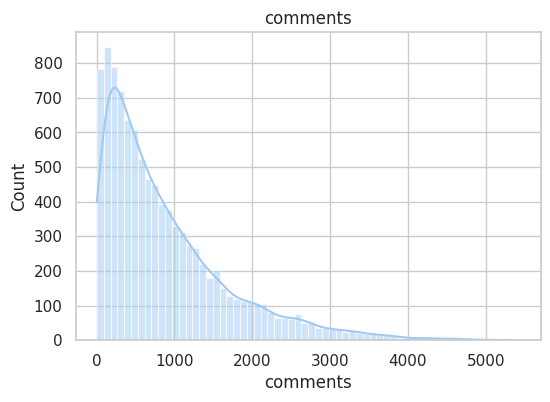

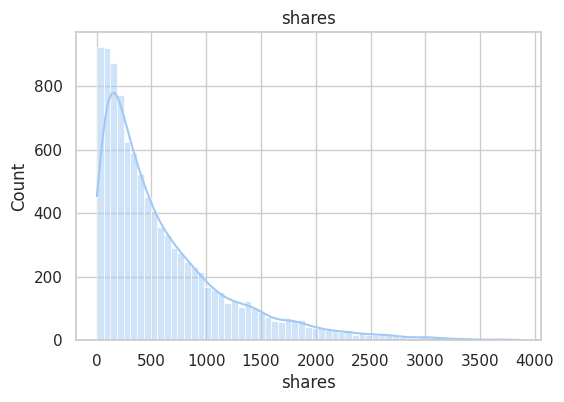

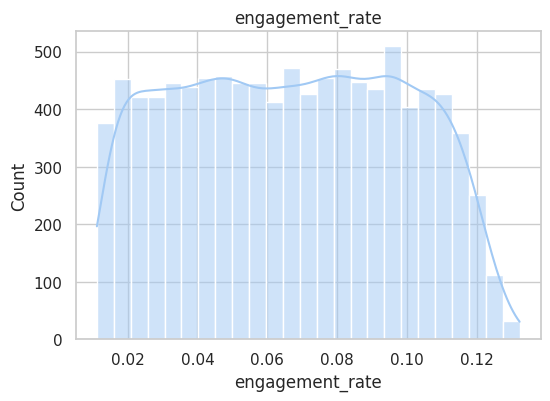

In [14]:
#single column analysis
for column in numerical_colums:
    plt.figure(figsize=(6,4))
    sns.histplot(df[column],kde=True)
    plt.title(column)
    plt.show()

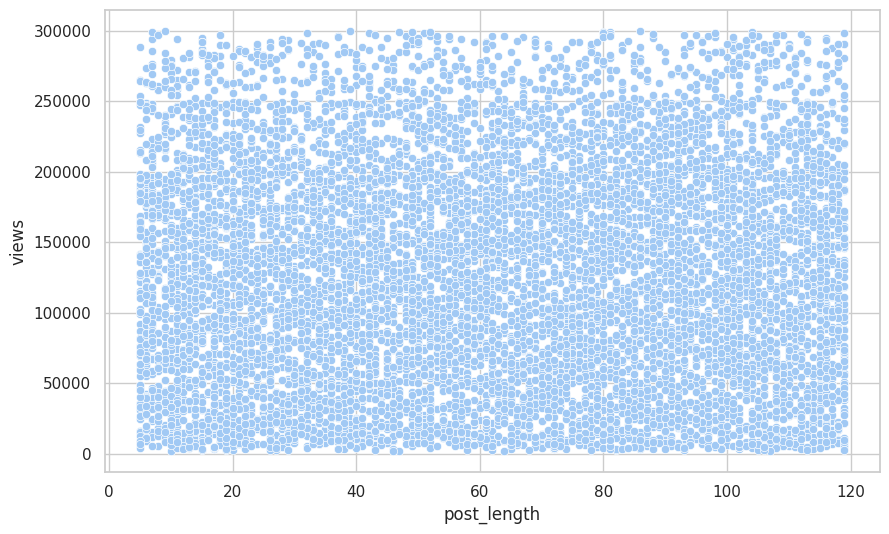

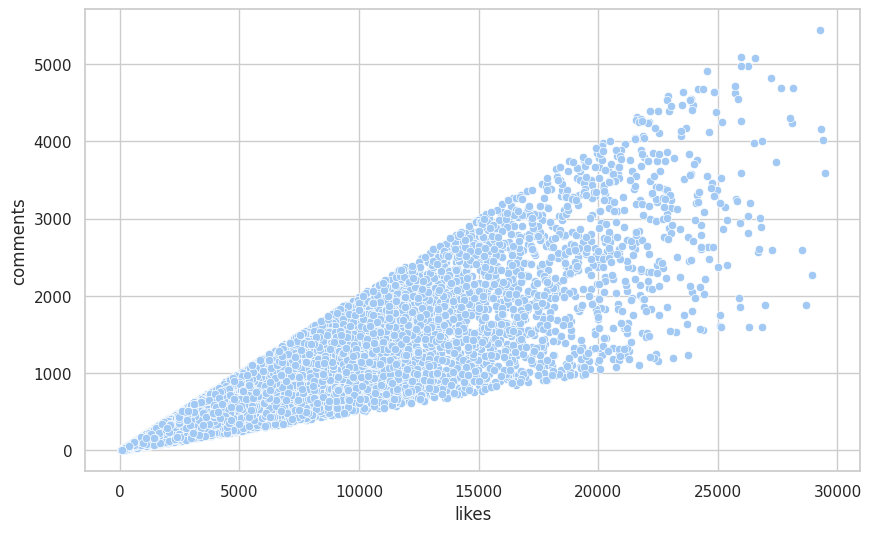

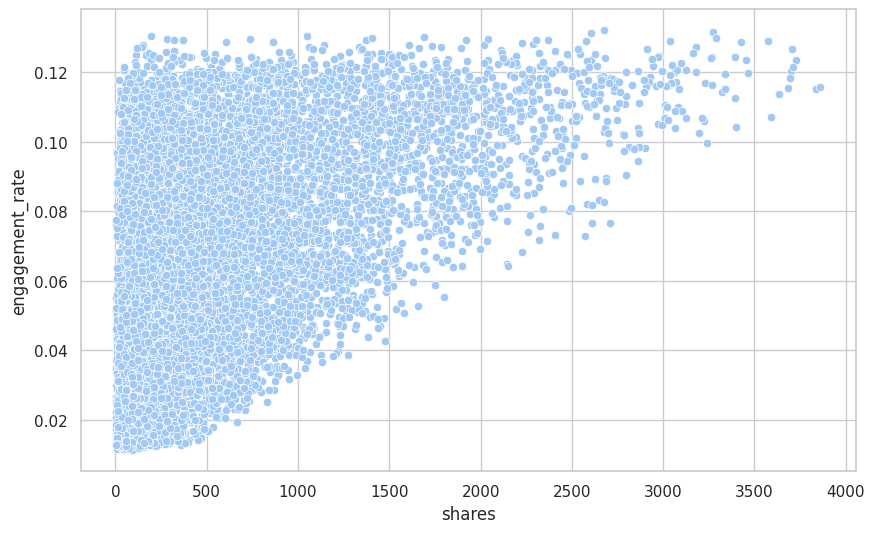

In [15]:
#scatter plots
for i in range(0,len(numerical_colums),2):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df,x=numerical_colums[i],y=numerical_colums[i+1])
    plt.show()


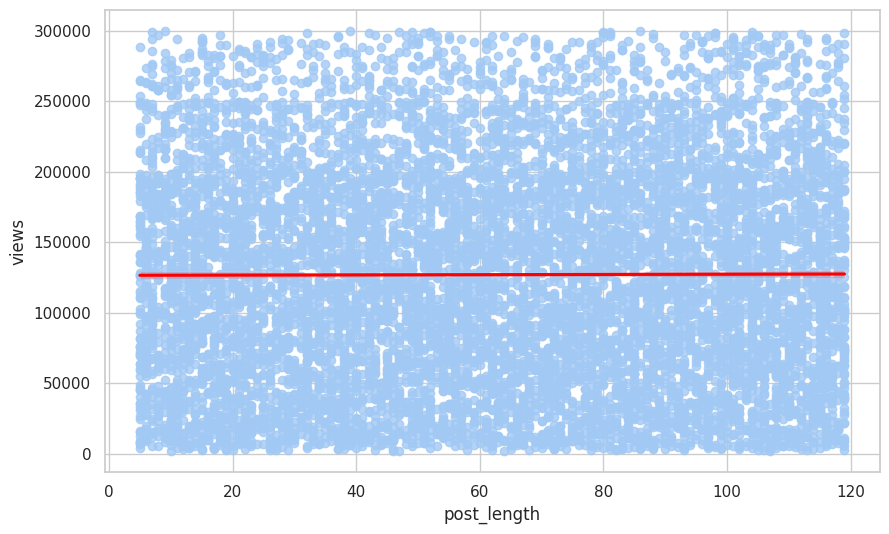

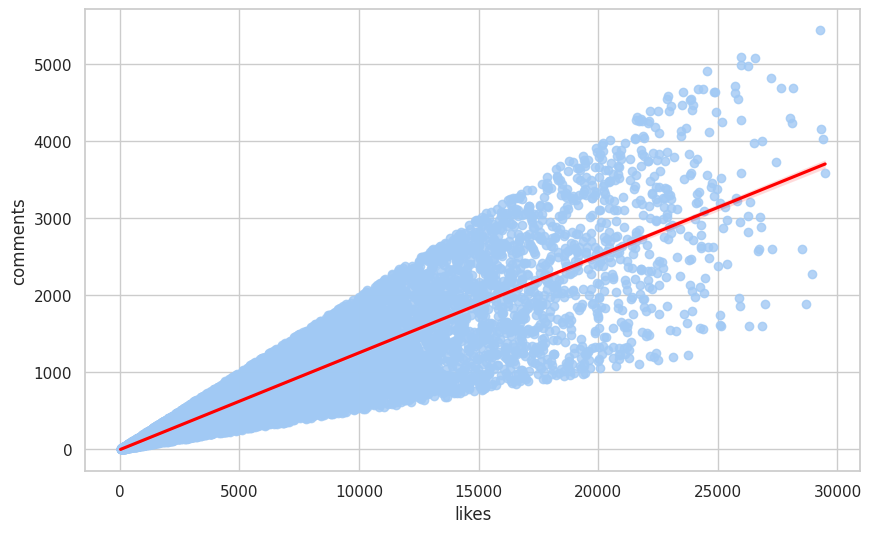

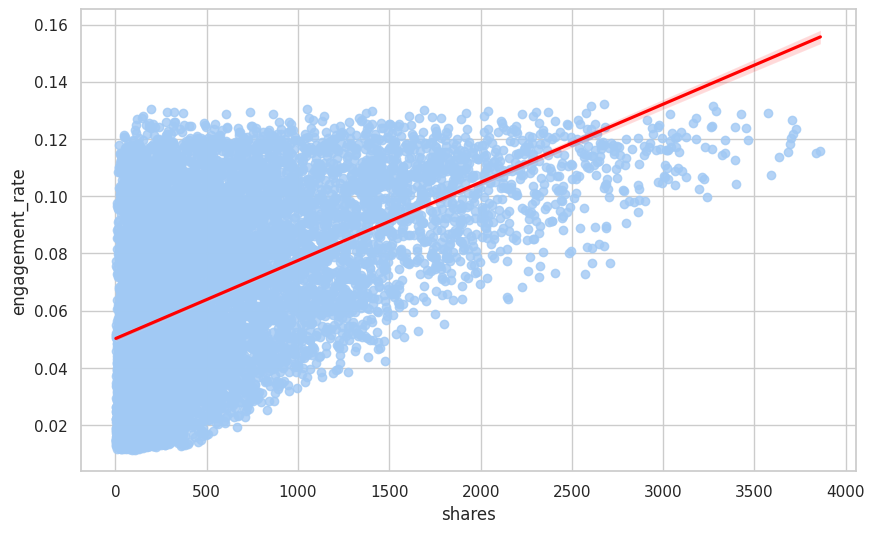

In [16]:
#regression plots
for i in range(0,len(numerical_colums),2):
    plt.figure(figsize=(10,6))
    sns.regplot(data=df,x=numerical_colums[i],y=numerical_colums[i+1],line_kws={"color":"red"})
    plt.show()

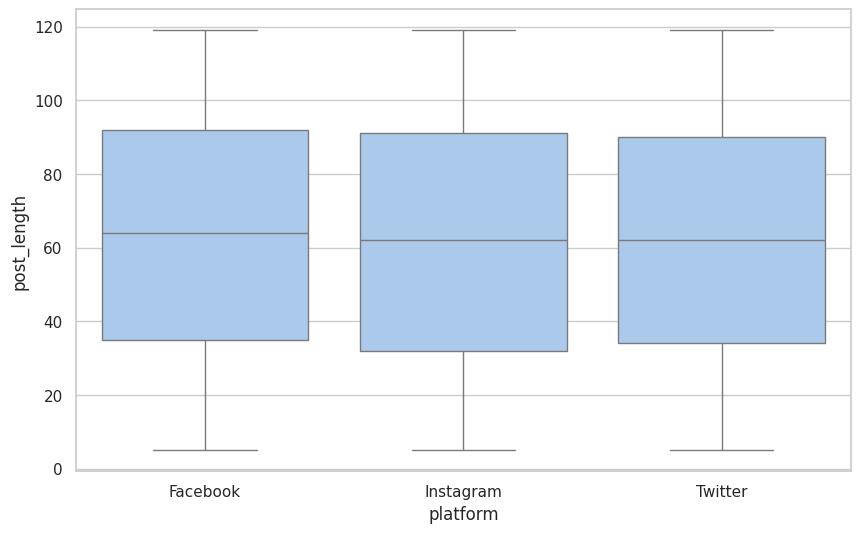

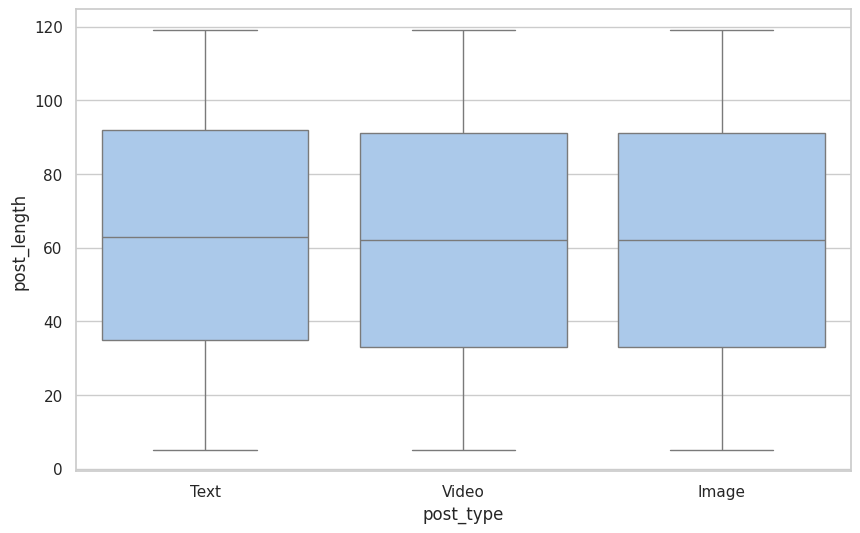

In [17]:
# Categorical vs Numerical column analysis
for column in categorical_colums:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df,x=column,y=numerical_colums[0])
    plt.show()

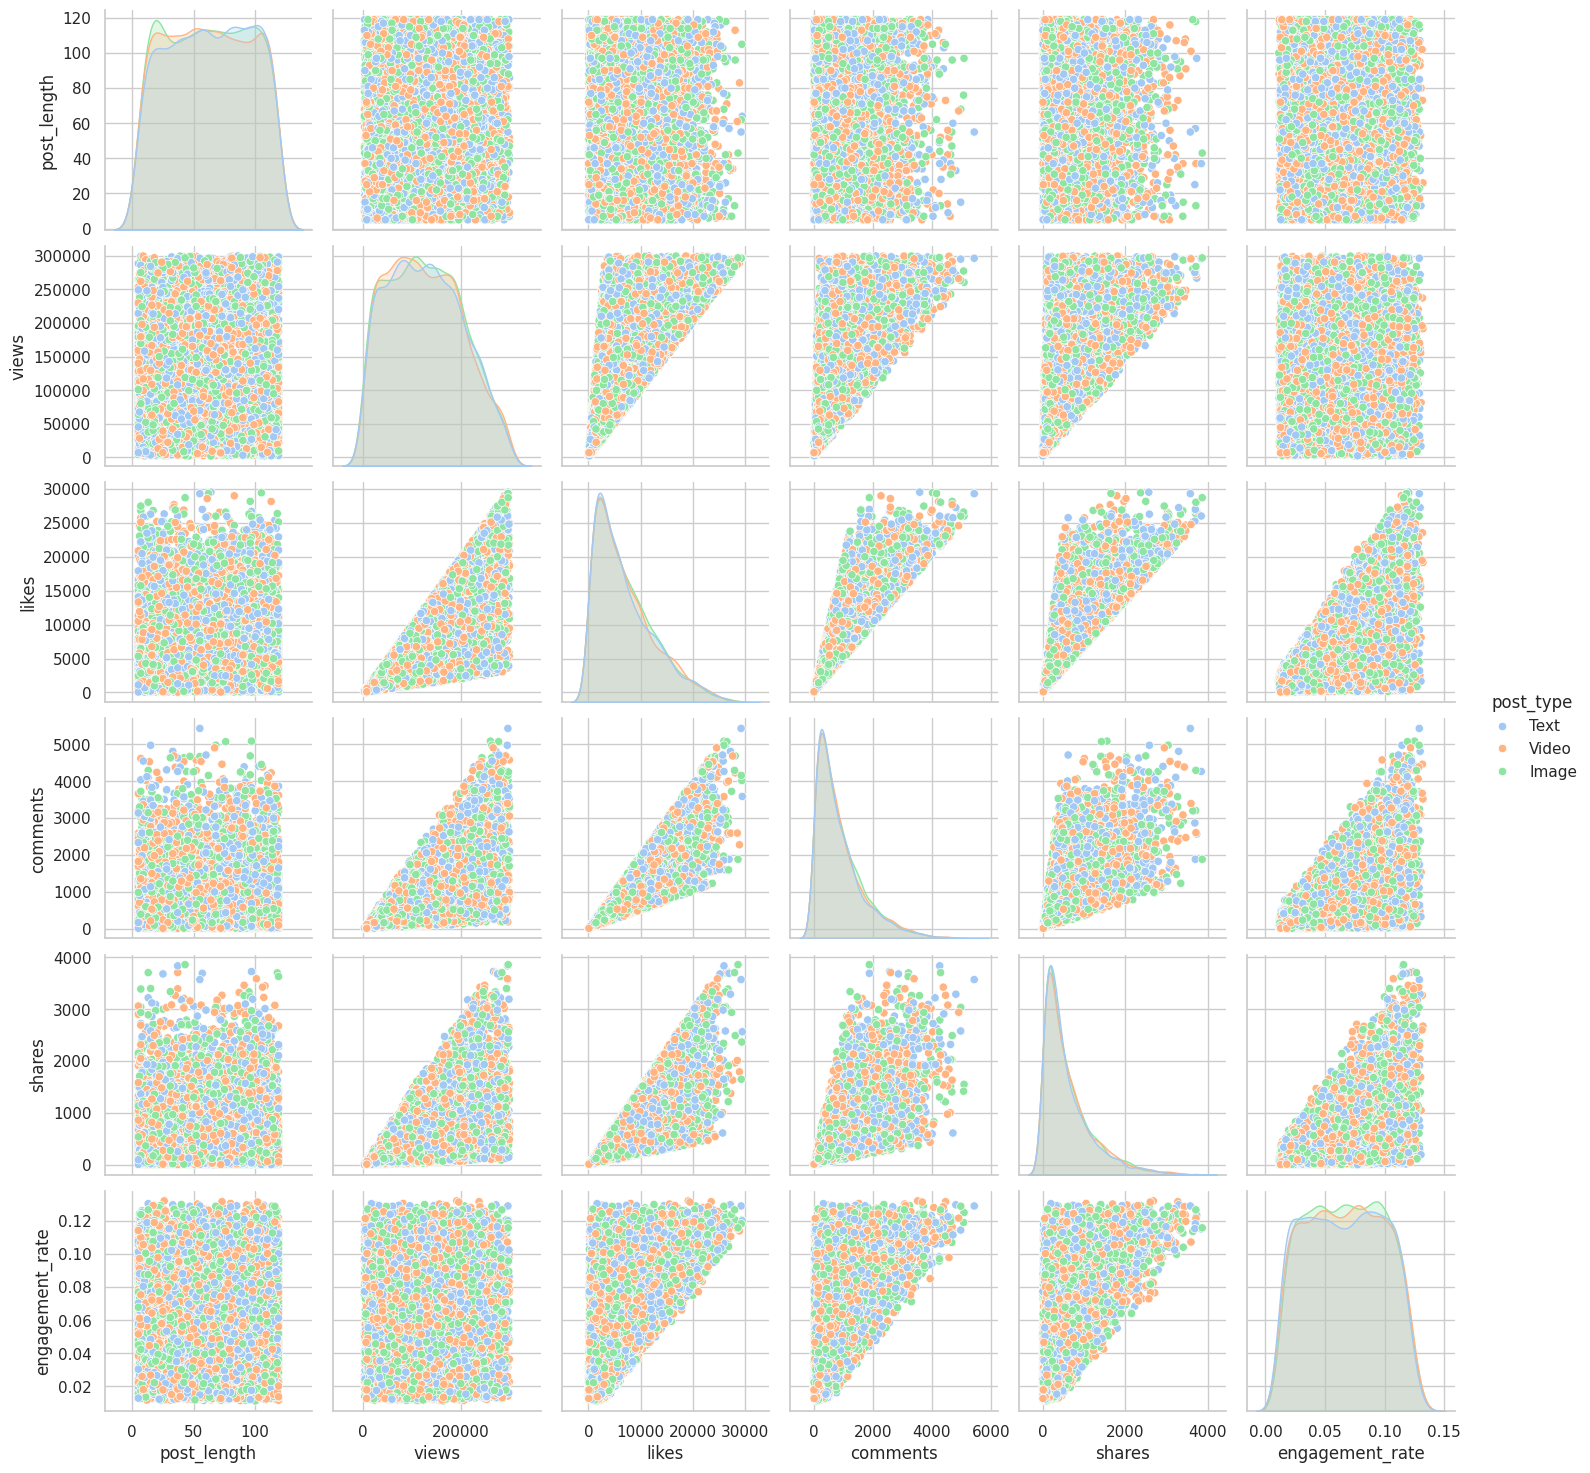

In [18]:
#pairplot
sns.pairplot(df,hue="post_type")
plt.show()


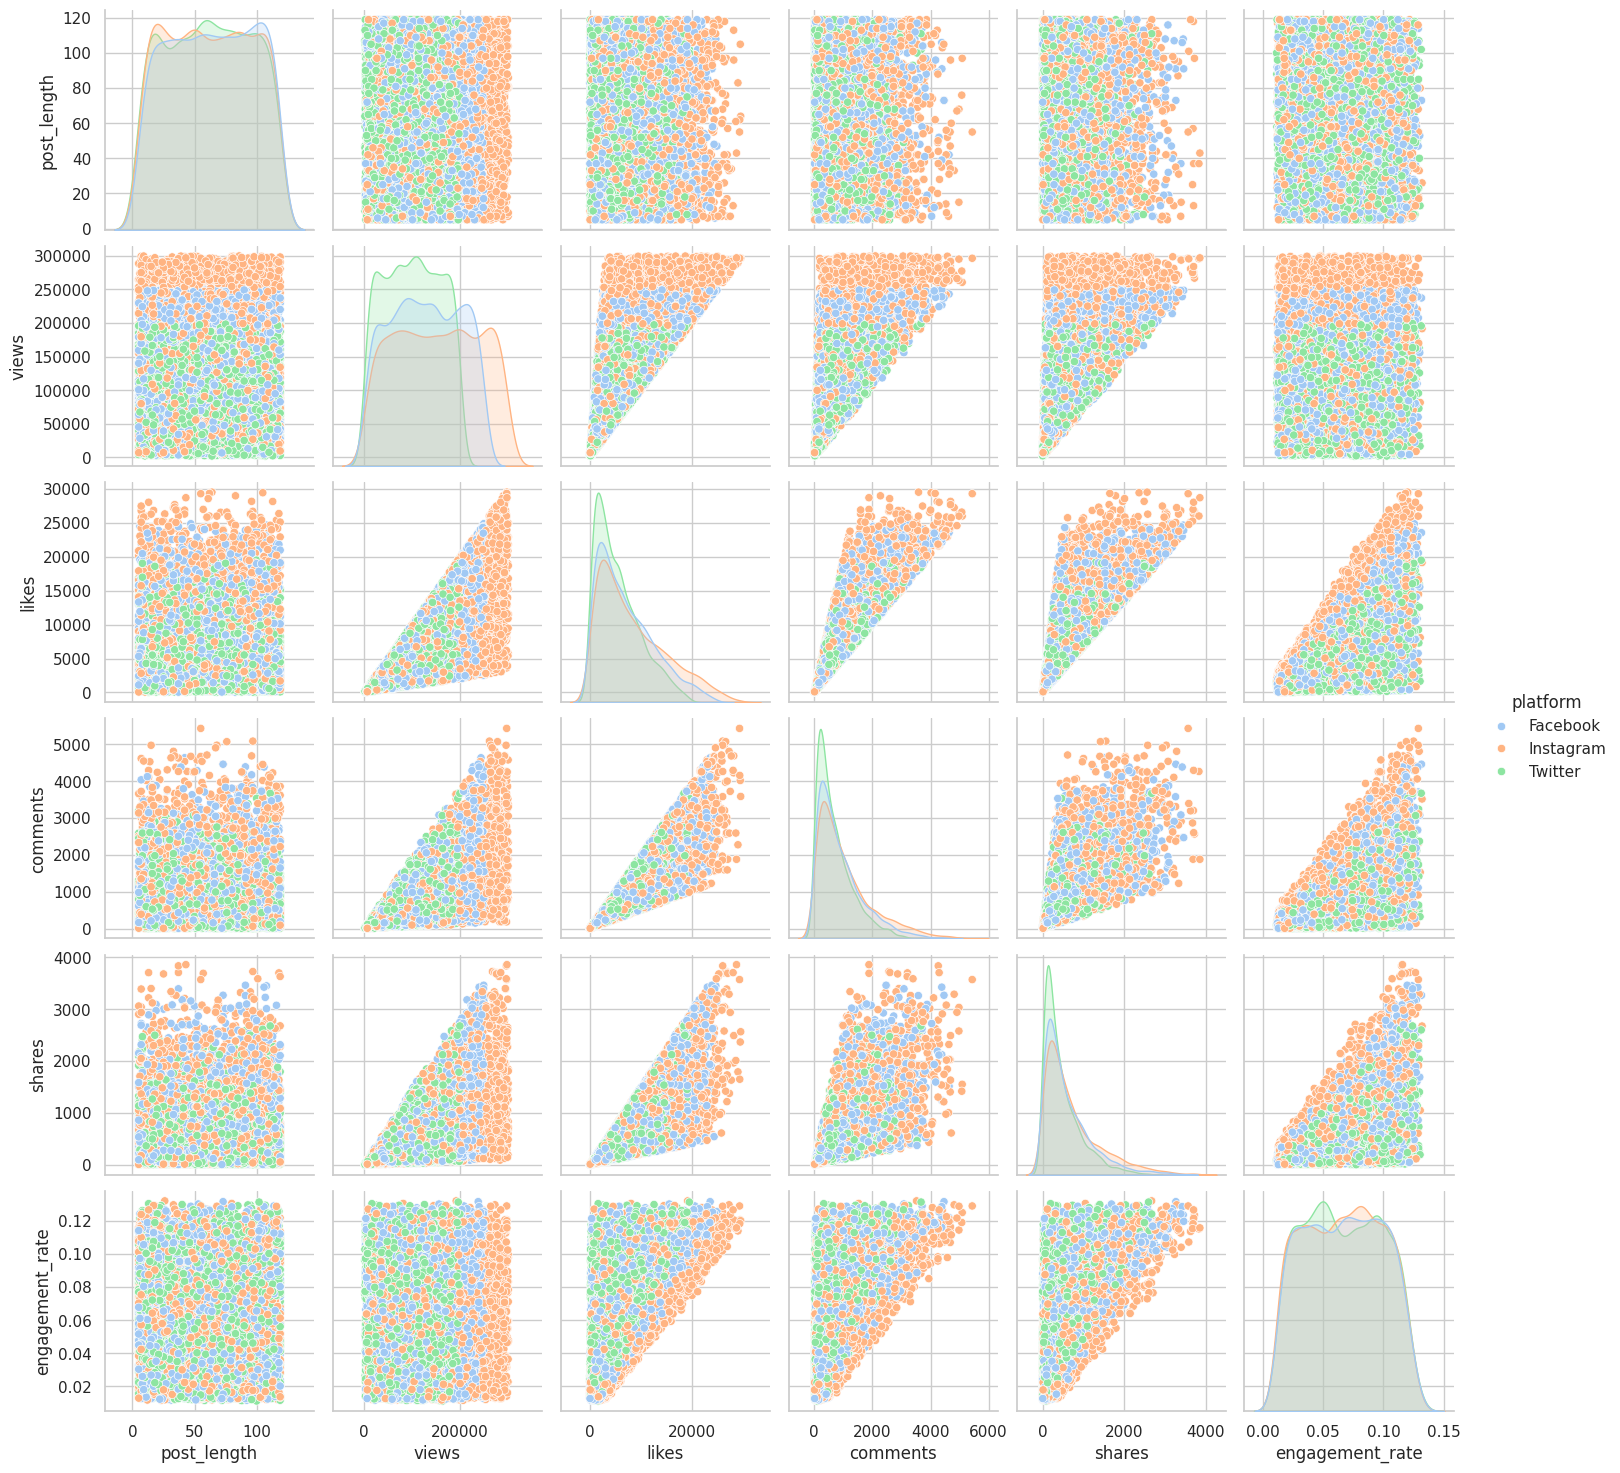

In [19]:
sns.pairplot(df,hue="platform")
plt.show()

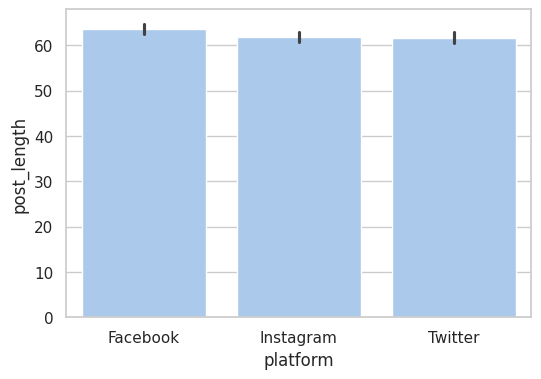

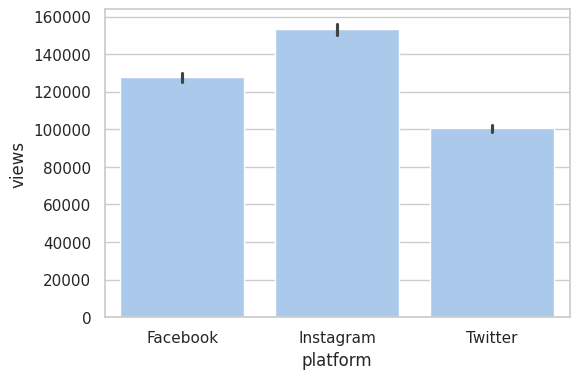

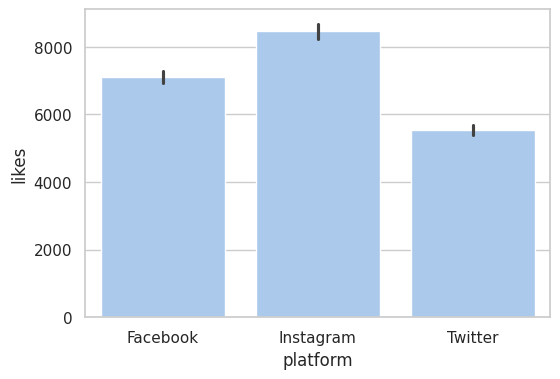

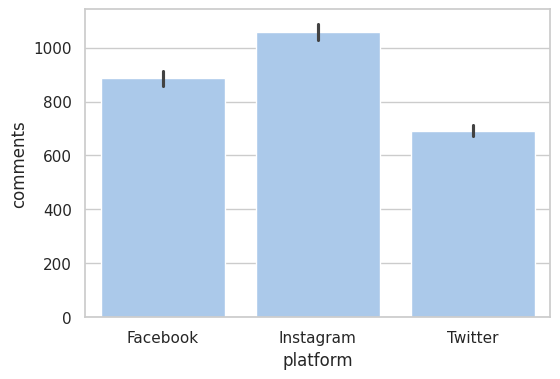

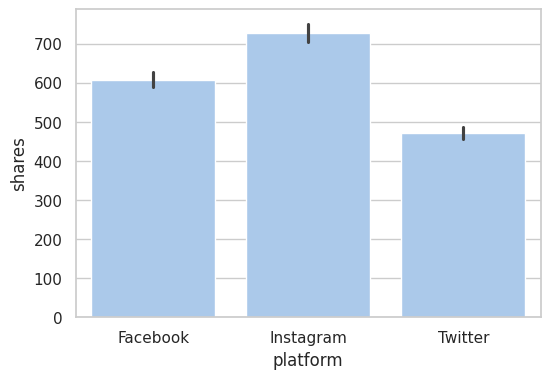

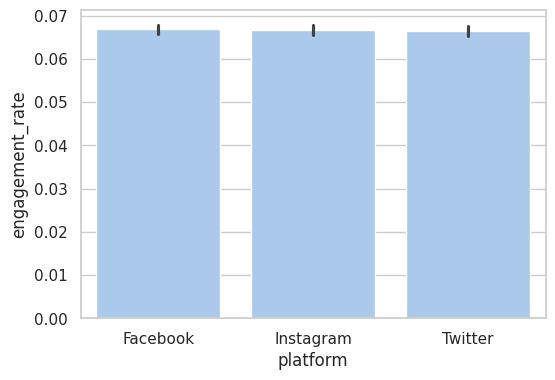

In [23]:
#platform wise analysis
for col in numerical_colums:
    plt.figure(figsize=(6,4))
    sns.barplot(data=df,x="platform",y=col)
    plt.show()

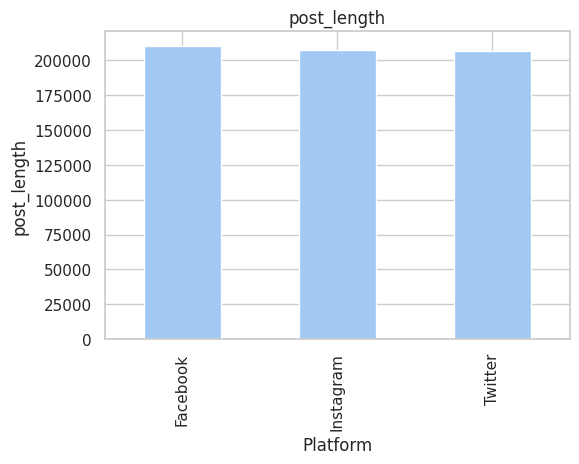

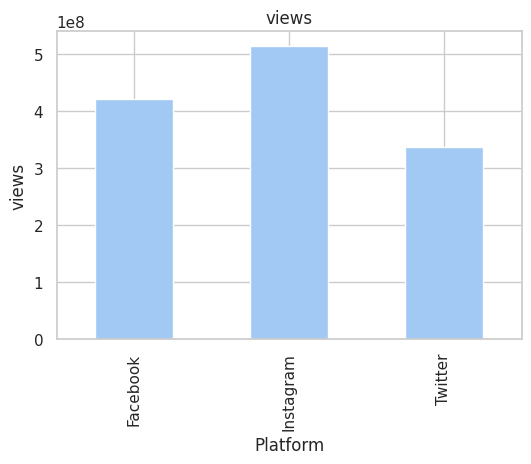

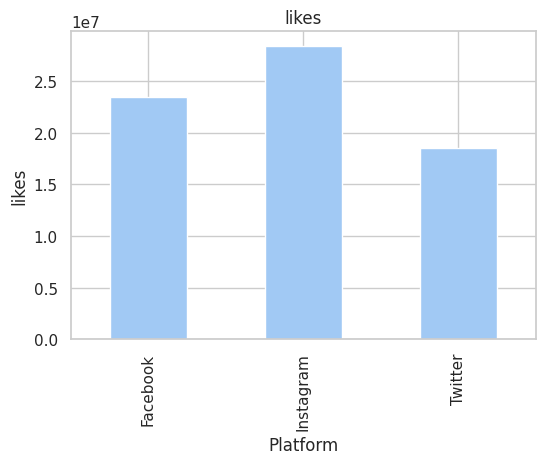

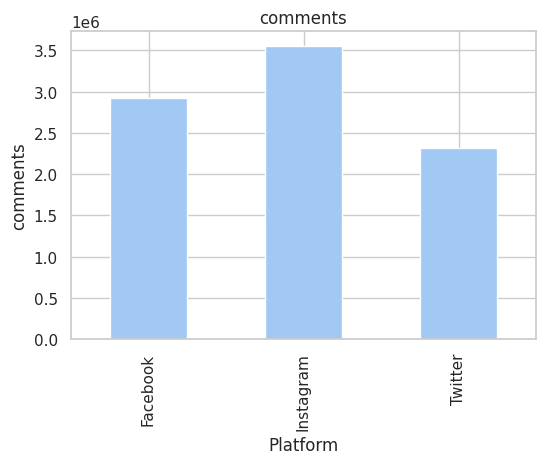

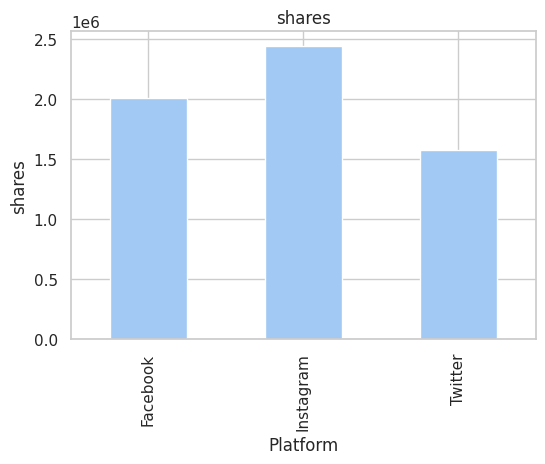

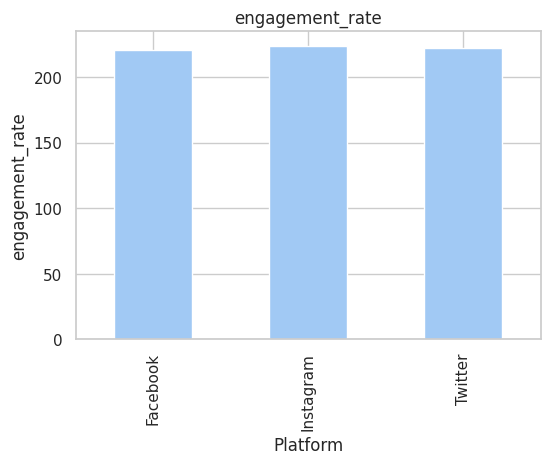

In [25]:
for col in numerical_colums:
    plt.figure(figsize=(6,4))
    df.groupby('platform')[col].sum().plot(kind="bar")
    plt.xlabel("Platform")
    plt.ylabel(col)
    plt.title(col)
    plt.show()

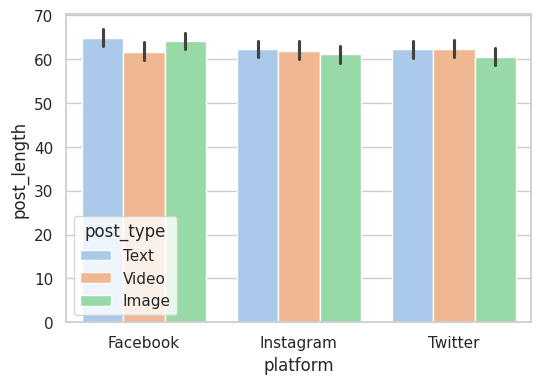

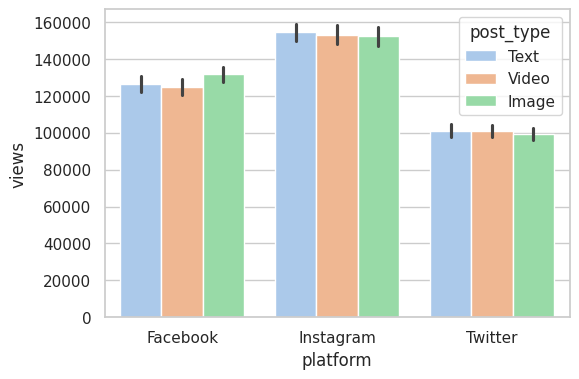

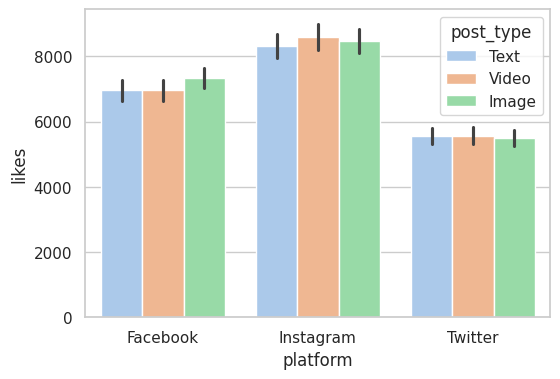

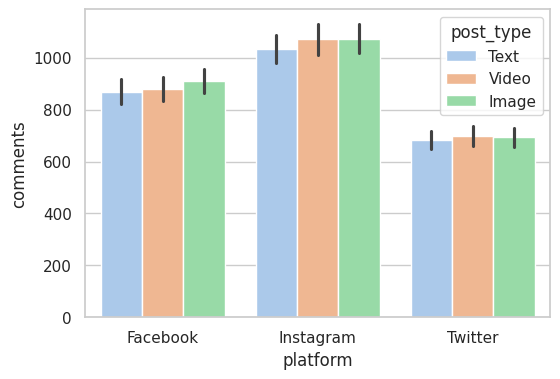

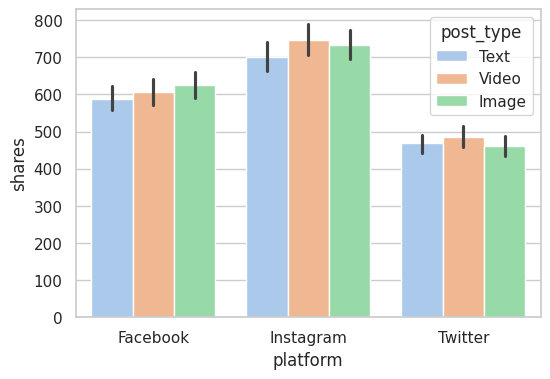

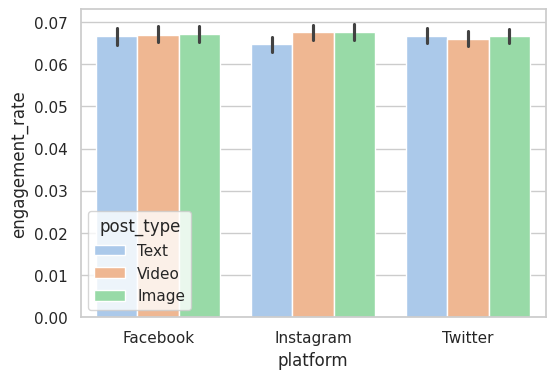

In [26]:
#platform vs post_type analysis
for col in numerical_colums:
    plt.figure(figsize=(6,4))
    sns.barplot(data=df,x="platform",y=col,hue="post_type")
    plt.show()
